In [1]:
import delta
import pyspark
import pandas as pd
import os
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib

/var/folders/sf/424s7btn3zj9ttvbs1cdzbd80000gn/T/ipykernel_3303/2112322159.py:20: FutureWarning: The provided callable <function mean at 0x12b0b8680> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  sns.lineplot(x="month", y="avg_value", hue="year", data=df.groupby(["year", "month"]).agg(avg_value=("avg_value", np.mean)))


<Axes: xlabel='month', ylabel='avg_value'>

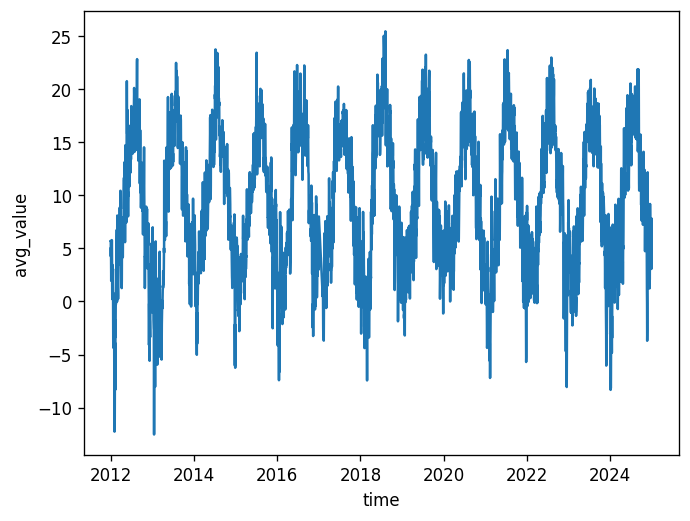

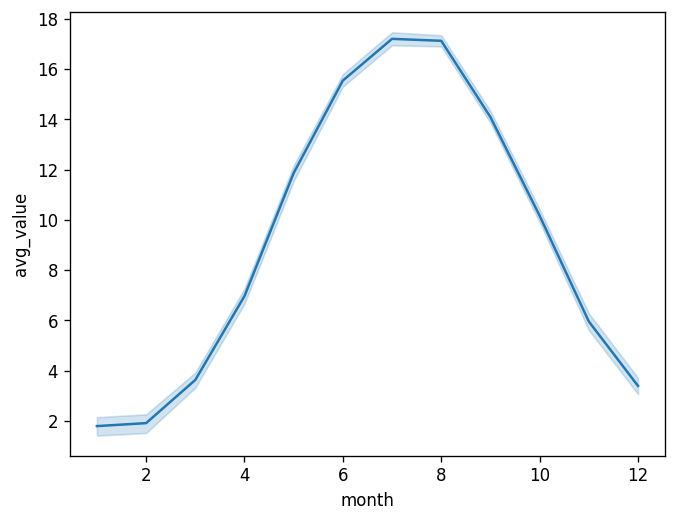

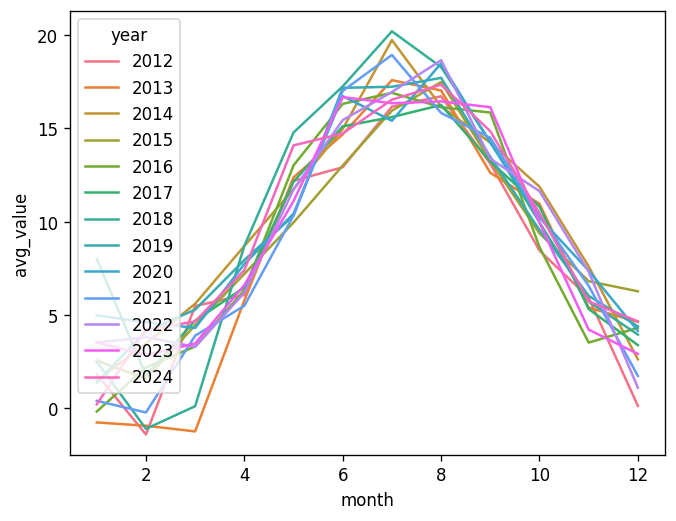

In [18]:
import numpy as np


data_type = 'temp_dry'
path = pathlib.Path("/Users/wiz/projects/predictive-modeling")
path_files = (path / 'data' / "daily_weather_data" / "station=Roskilde Lufthavn" / f"data_type={data_type}").rglob("*.parquet")
path_files = filter(lambda p: not p.as_posix().endswith(".crc"), path_files)
path_files = filter(lambda p: "checkpoint" not in p.as_posix(), path_files)
df = pd.concat(map(pd.read_parquet, path_files))
df = pd.DataFrame(df, columns=df.columns).drop_duplicates(ignore_index=True)
df['time'] = pd.to_datetime(df['day_key'], format='%Y%m%d')
df['month'] = df['time'].dt.month
df['year'] = df['time'].dt.year.astype("str")

fig, ax = plt.subplots(dpi=120)
sns.lineplot(x="time", y="avg_value", data=df)
fig, ax = plt.subplots(dpi=120)
sns.lineplot(x="month", y="avg_value", data=df)
fig, ax = plt.subplots(dpi=120)
sns.lineplot(x="month", y="avg_value", hue="year", data=df.groupby(["year", "month"]).agg(avg_value=("avg_value", np.mean)))

/var/folders/sf/424s7btn3zj9ttvbs1cdzbd80000gn/T/ipykernel_3303/287414884.py:17: FutureWarning: The provided callable <function mean at 0x12b0b8680> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  sns.lineplot(x="month", y="avg_value", hue="year", data=df.groupby(["year", "month"]).agg(avg_value=("avg_value", np.mean)))


<Axes: xlabel='month', ylabel='avg_value'>

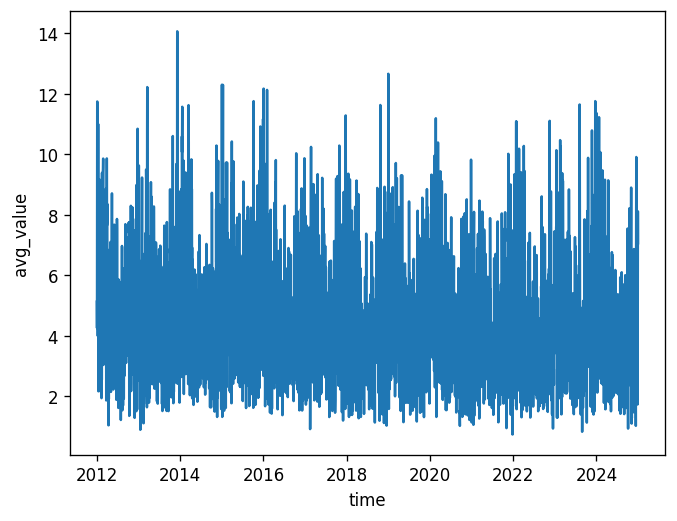

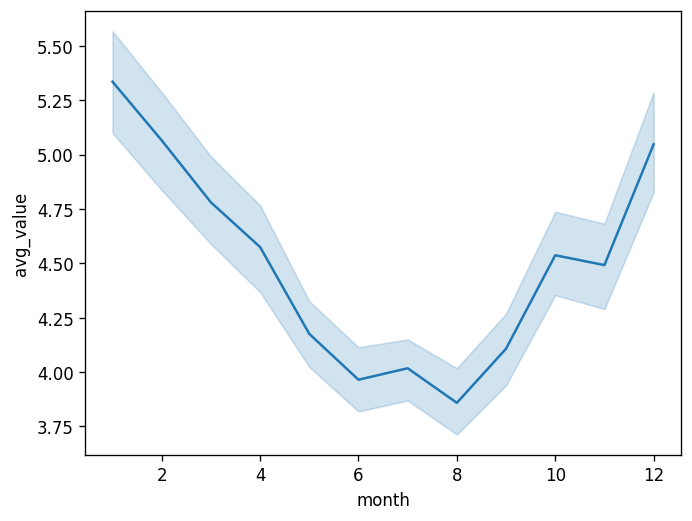

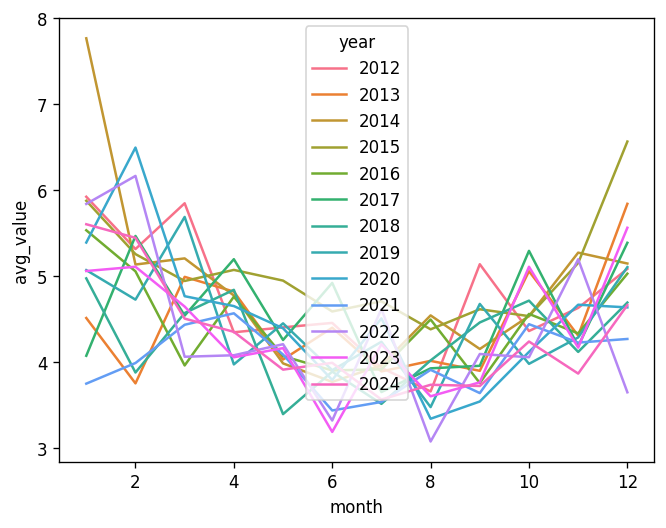

In [17]:
data_type = 'wind_speed'
path = pathlib.Path("/Users/wiz/projects/predictive-modeling")
path_files = (path / 'data' / "daily_weather_data" / "station=Roskilde Lufthavn" / f"data_type={data_type}").rglob("*.parquet")
path_files = filter(lambda p: not p.as_posix().endswith(".crc"), path_files)
path_files = filter(lambda p: "checkpoint" not in p.as_posix(), path_files)
df = pd.concat(map(pd.read_parquet, path_files))
df = pd.DataFrame(df, columns=df.columns).drop_duplicates(ignore_index=True)
df['time'] = pd.to_datetime(df['day_key'], format='%Y%m%d')
df['month'] = df['time'].dt.month
df['year'] = df['time'].dt.year.astype("str")

fig, ax = plt.subplots(dpi=120)
sns.lineplot(x="time", y="avg_value", data=df)
fig, ax = plt.subplots(dpi=120)
sns.lineplot(x="month", y="avg_value", data=df)
fig, ax = plt.subplots(dpi=120)
sns.lineplot(x="month", y="avg_value", hue="year", data=df.groupby(["year", "month"]).agg(avg_value=("avg_value", np.mean)))

       day_key  sum_value       time  month  year
0     20120101        5.0 2012-01-01      1  2012
1     20120102        6.1 2012-01-02      1  2012
2     20120103        8.4 2012-01-03      1  2012
3     20120104        1.8 2012-01-04      1  2012
4     20120105       11.3 2012-01-05      1  2012
...        ...        ...        ...    ...   ...
4744  20241227        0.1 2024-12-27     12  2024
4745  20241228        0.0 2024-12-28     12  2024
4746  20241229        0.7 2024-12-29     12  2024
4747  20241230        1.2 2024-12-30     12  2024
4748  20241231        1.2 2024-12-31     12  2024

[4749 rows x 5 columns]


<Axes: xlabel='month', ylabel='sum_value'>

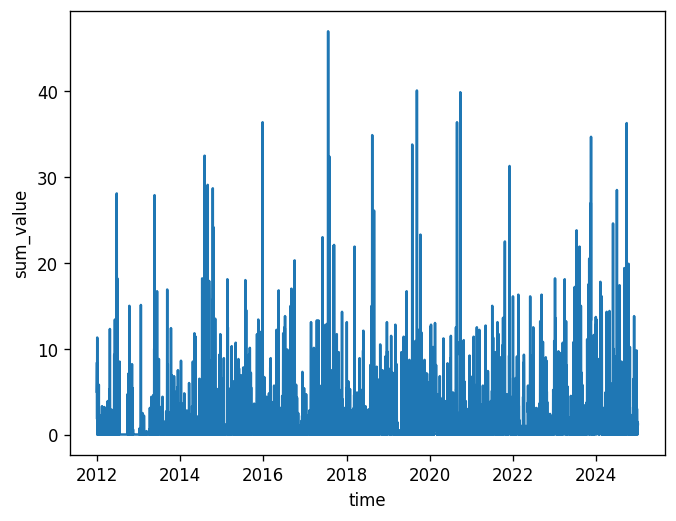

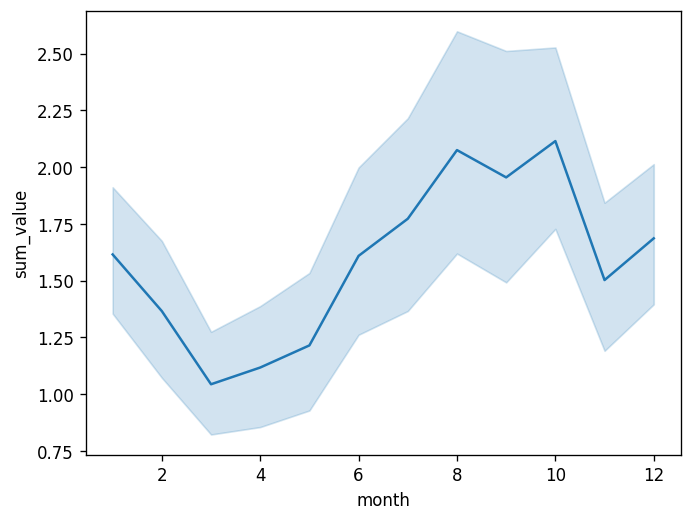

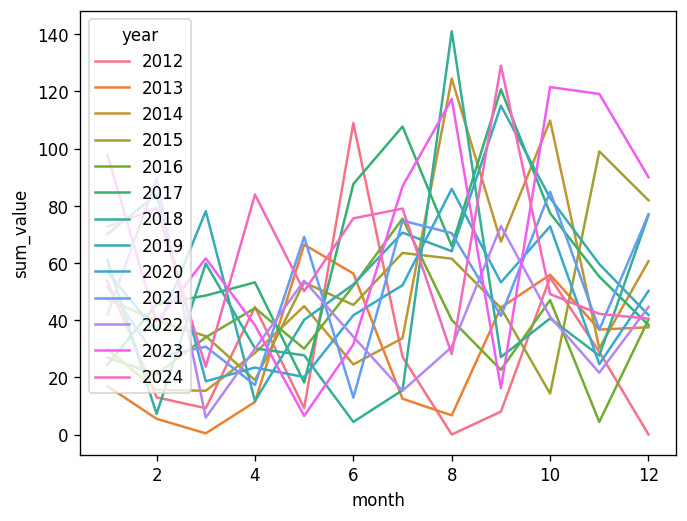

In [28]:
data_type = 'precip_past1h'
path = pathlib.Path("/Users/wiz/projects/predictive-modeling")
path_files = (path / 'data' / "weather_data" / "station=Roskilde Lufthavn" / f"data_type={data_type}").rglob("*.parquet")
path_files = filter(lambda p: not p.as_posix().endswith(".crc"), path_files)
path_files = filter(lambda p: "checkpoint" not in p.as_posix(), path_files)
df = pd.concat(map(pd.read_parquet, path_files))
df = pd.DataFrame(df, columns=df.columns).drop_duplicates(ignore_index=True)
df['time'] = pd.to_datetime(df['time'], format='%Y%m%d')
df['month'] = df['time'].dt.month
df['year'] = df['time'].dt.year.astype("str")

agg_df = df.groupby("day_key", as_index=False).agg(sum_value=("value", "sum"))
agg_df['time'] = pd.to_datetime(agg_df['day_key'], format='%Y%m%d')
agg_df['month'] = agg_df['time'].dt.month
agg_df['year'] = agg_df['time'].dt.year.astype("str")
print(agg_df)

fig, ax = plt.subplots(dpi=120)
sns.lineplot(x="time", y="sum_value", data=agg_df)
fig, ax = plt.subplots(dpi=120)
sns.lineplot(x="month", y="sum_value", data=agg_df)
fig, ax = plt.subplots(dpi=120)
sns.lineplot(x="month", y="sum_value", hue="year", data=agg_df.groupby(["year", "month"]).agg(sum_value=("sum_value", "sum")))